# 2023B Testing lab sparkles synched
This is after getting the camera fixed

In [2]:
from astropy.io import fits
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tempfile
import imageio
from scipy import signal
from importlib import reload
from scipy.optimize import curve_fit
import pandas as pd
# importing the new code
import sparkles.spark as spkl
import sparkles.spark_lab as slab
import sparkles.spark_plots as splot

In [3]:
reload(slab)

<module 'sparkles.spark_lab' from '/home/eden/code/sparkles/sparkles/spark_lab.py'>

In [4]:
# common directories
data_dir = '/home/eden/data/LAB_2023B/'
lab_dir = '/home/eden/data/2023A/LAB/'
RM_dir = "/home/eden/data/self_RMs/"
# calibration files
dir_calib = '../data/calib/'
mask = 'aol1_wfsmask.fits'
ref = 'aol1_wfsref.fits'
dark = 'camwfs-dark_bin2_2000.000000_600.000000_-45.000000__T20220422005142597501326.fits'

In [5]:
os.listdir(data_dir)

['sparkle_synch_test_20231218T201512',
 'sparkle_synch_test_20231218T201724',
 'data_splits_list_syncspark.npy',
 'unsync_sparkles_1khz_dark_20231221T213710',
 'synd_sparkles_1khz_20231221T220804',
 'sync_sparkles_1khz_dark_20231221T220206',
 'unsync_sparkles_1khz_20231221T214447',
 'data_splits_stack_sync_23B.npy',
 'data_splits_stack_unsync_23B.npy',
 'data_roll_stack_sync_23B.npy',
 'duty_cycle_tests',
 'pwfs_emg20_sync_open_20240207',
 'pwfs_emg20_sync_shut_20240207',
 'spark_emg20_sync_amp02_sep22',
 'spark_emg20_sync',
 'spark_emg20_unsync',
 'spark_emg20_sync_amp02_sep15',
 'spark_emg20_sync_amp05_sep15',
 'spark_emg20_sync_amp01_sep20',
 'spark_emg20_sync_amp02_sep20',
 'spark_emg20_sync_amp05_sep20',
 'data_roll_stack_spark_emg20_sync_amp02_sep22_data_roll.npy',
 'data_roll_stack_spark_emg20_sync_amp02_sep22.npy']

In [6]:
lab_list = [
 'spark_emg20_sync_amp02_sep15',
 'spark_emg20_sync_amp05_sep15',
 'spark_emg20_sync_amp01_sep20',
 'spark_emg20_sync_amp02_sep20',
 'spark_emg20_sync_amp05_sep20']
 #'spark_emg20_sync_amp02_sep22',

## Plots for lab data processing 

In [28]:
reload(slab)

<module 'sparkles.spark_lab' from '/home/eden/code/sparkles/sparkles/spark_lab.py'>

In [7]:
## Synched lab data
lab_dir = '/home/eden/data/LAB_2023B/'
sync_23B_dark = 'dark_sync_sparkles_1khz_dark_20231221T220206.fits'

In [9]:
# ONLY DO THIS ONCE
for f_tmp in lab_list:
    sync_dir = lab_dir + f_tmp + '/camwfs/'
    roll_file =  f_tmp
    tmp_sync_spark = spkl.Spark(sync_dir, sync_dir, spkl.glob_dir_calib, sync_23B_dark, spkl.glob_ref, spkl.glob_dark) 
    data_roll_stack = slab.proc_lab_data_roll(tmp_sync_spark, lab_dir, filename = roll_file)

HZ value: 3600
HZ value: 3600
Number of DATA files:  37043
Number of REF files:  37043
MOD : 1   TRIG : 1   FREQ : 2000   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  
MOD : 1   TRIG : 1   FREQ : 2000   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  
GENERATING REFERENCE
=> Sampling 100 files, starting at 0
File count: 37043, Block size: 40000, Blocks: 1
Start roll orientation 0
START: Block 0 starting with file 0!
ERROR: changing n_end to file count
chunksize=1852, n_workers=20
Start roll orientation 1
START: Block 0 starting with file 0!
ERROR: changing n_end to file count
chunksize=1852, n_workers=20
Start roll orientation 2
START: Block 0 starting with file 0!
ERROR: changing n_end to file count
chunksize=1852, n_workers=20
Start roll orientation 3
START: Block 0 starting with file 0!
ERROR: changing n_end to file count
chunksize=1852, n_workers=20
SAVED: /home/eden/data/LAB_2023B//data_roll_stack_spark_emg20_sync_amp02_sep15.npy
HZ value: 3600
HZ value: 3600
Number of DATA fil

## Look through all files, see what the rolls are like:

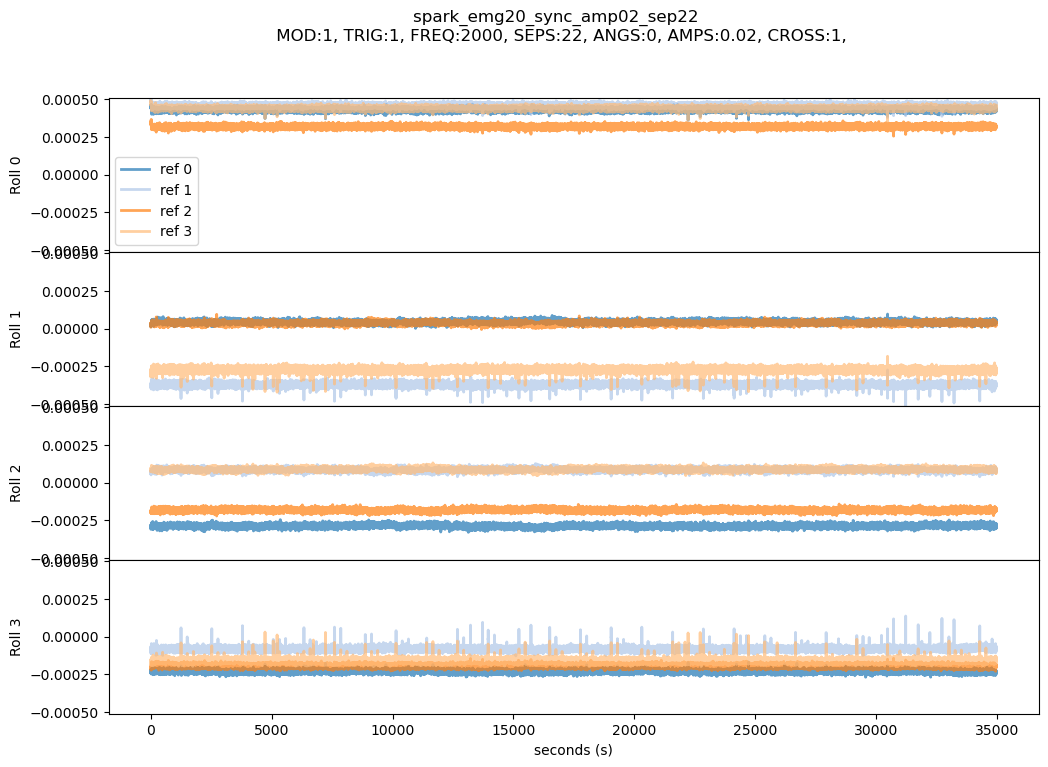

FileNotFoundError: [Errno 2] No such file or directory: '/home/eden/data/LAB_2023B//data_roll_stack_spark_emg20_sync_amp02_sep15.npy'

In [32]:
for f_tmp in lab_list:
    sync_dir = lab_dir + f_tmp + '/camwfs/'
    roll_file = f"{lab_dir}/data_roll_stack_{f_tmp}.npy"
    roll_data = np.load(roll_file)
    slab.plot_time_series_roll(roll_data, sync_dir, f_tmp, n_avg = 1000, hz = 1000)
    plt.show()
